In [1]:
from IPython.display import display, Math, Markdown
import matplotlib.pyplot as plt
import numpy as np
import os, sys
from PIL import Image
import rslaser
from scipy.ndimage.filters import gaussian_filter

In [2]:
image_file_name = 'basler_532nm_pump.bmp'
package_data_dir = rslaser.pkg_resources.resource_filename('rslaser','package_data')
path_to_file = os.path.join(package_data_dir, image_file_name)
image = Image.open(path_to_file)
img_orig = np.array(image)

In [3]:
print('np.shape(img_orig) = ', np.shape(img_orig))
print('min_orig = ', np.min(img_orig))
print('max_orig = ', np.max(img_orig))

# read the pixel size from the diagnostic metadata file
meta_data_file_name = 'basler_meta.dat'
path_to_file2 = os.path.join(package_data_dir, meta_data_file_name)
with open(path_to_file2) as fh:
    for line in fh:
        if line.startswith("pixel_size_h_microns"):
            pixel_size_h = float(line.split(":")[-1].split(",")[0])  # microns
        if line.startswith("pixel_size_v_microns"):
            pixel_size_v = float(line.split(":")[-1].split(",")[0])  # microns
display(Markdown(' pixel size is {} [$\mu m$] by {} [$\mu m$]'.format(pixel_size_h,pixel_size_v)))

np.shape(img_orig) =  (540, 720)
min_orig =  6
max_orig =  175


 pixel size is 6.9 [$\mu m$] by 6.9 [$\mu m$]

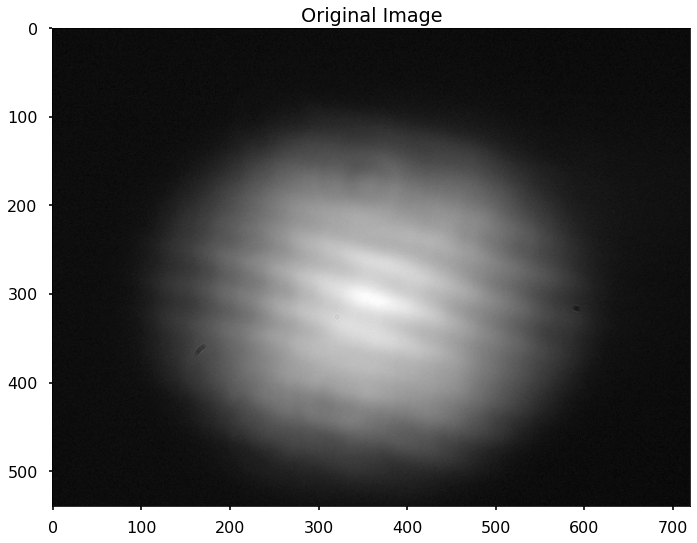

In [4]:
with plt.style.context(('seaborn-poster')):
    fig = plt.figure()
    ax = fig.gca()
    ax.imshow(img_orig, cmap='gray', vmin=np.min(img_orig), vmax=np.max(img_orig))
    ax.set_title("Original Image")

np.shape(img_smooth) =  (540, 720)
min_smooth =  12
max_smooth =  154


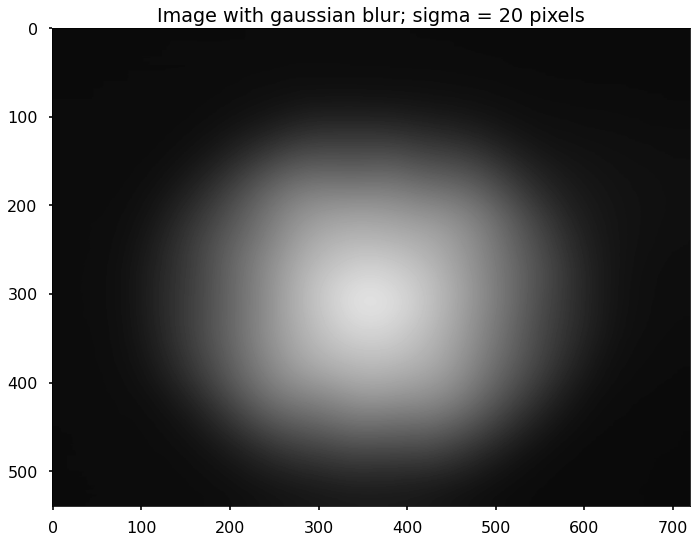

In [5]:
blur = 20
img_smooth = gaussian_filter(img_orig, sigma=blur)

print('np.shape(img_smooth) = ', np.shape(img_smooth))
print('min_smooth = ', np.min(img_smooth))
print('max_smooth = ', np.max(img_smooth))

with plt.style.context(('seaborn-poster')):
    fig = plt.figure()
    ax = fig.gca()
    ax.imshow(img_smooth, cmap='gray', vmin=np.min(img_orig), vmax=np.max(img_orig))
    ax.set_title("Image with gaussian blur; sigma = " + str(blur) + " pixels")

np.shape(img_diff) =  (540, 720)
min_diff =  -19.0
max_diff =  21.0
relative deviation (above) =  12.0 %
relative deviation (below) =  10.857142857142858 %


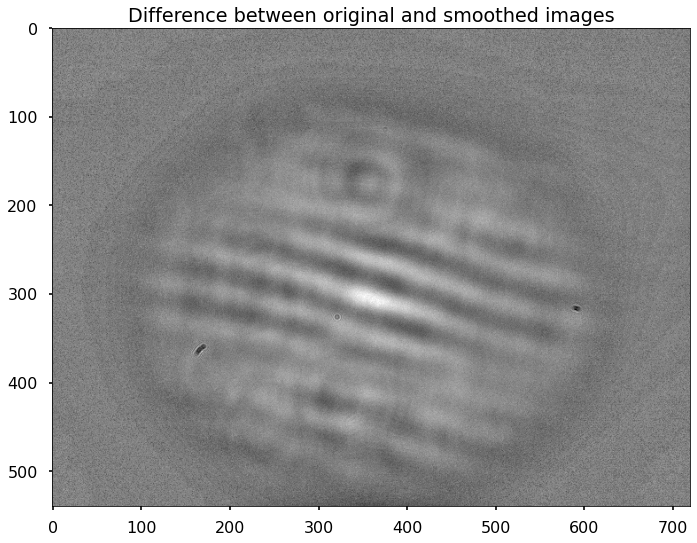

In [6]:
img_diff = img_orig - 1.*img_smooth

print('np.shape(img_diff) = ', np.shape(img_diff))
print('min_diff = ', np.min(img_diff))
print('max_diff = ', np.max(img_diff))

with plt.style.context(('seaborn-poster')):
    fig = plt.figure()
    ax = fig.gca()
    ax.imshow(img_diff, cmap='gray', vmin=np.min(img_diff), vmax=np.max(img_diff))
    ax.set_title("Difference between original and smoothed images")

print('relative deviation (above) = ', 100.*(np.max(img_diff)/np.max(img_orig)), '%')
print('relative deviation (below) = ', 100.*(abs(np.min(img_diff))/np.max(img_orig)), '%')

In [7]:
print(' ')
print('*************************')
print('img_orig = ')
print(img_orig)
min_orig = np.min(img_orig)
max_orig = np.max(img_orig)
print(' ')
print('min original = ', min_orig)
print('max original = ', max_orig)

print(' ')
print('*************************')
print('img_smooth = ')
print(img_smooth)
min_smooth = np.min(img_smooth)
max_smooth = np.max(img_smooth)
print(' ')
print('min smoothed = ', min_smooth)
print('max smoothed = ', max_smooth)

print(' ')
print('*************************')
print('img_diff = ')
print(img_diff)
min_diff = np.min(img_diff)
max_diff = np.max(img_diff)
print(' ')
print('min diff = ', min_diff)
print('max diff = ', max_diff)

 
*************************
img_orig = 
[[15 17 12 ... 12 12 15]
 [12 15 15 ... 15 15 15]
 [15 12 15 ... 17 12 12]
 ...
 [12 15  9 ... 12 15 15]
 [15 15 15 ... 15 15 12]
 [15 15 15 ...  9 12 12]]
 
min original =  6
max original =  175
 
*************************
img_smooth = 
[[13 13 13 ... 13 13 13]
 [13 13 13 ... 13 13 13]
 [13 13 13 ... 13 13 13]
 ...
 [13 13 13 ... 12 12 12]
 [13 13 13 ... 12 12 12]
 [13 13 13 ... 12 12 12]]
 
min smoothed =  12
max smoothed =  154
 
*************************
img_diff = 
[[ 2.  4. -1. ... -1. -1.  2.]
 [-1.  2.  2. ...  2.  2.  2.]
 [ 2. -1.  2. ...  4. -1. -1.]
 ...
 [-1.  2. -4. ...  0.  3.  3.]
 [ 2.  2.  2. ...  3.  3.  0.]
 [ 2.  2.  2. ... -3.  0.  0.]]
 
min diff =  -19.0
max diff =  21.0
